In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from datetime import datetime

In [2]:
df0 = pd.read_csv("meteo_202301-202304.csv", na_filter = True)
df1 = pd.read_csv("meteo_202109-202112.csv", na_filter = True)  
df2 = pd.read_csv("meteo_202201-202212.csv", na_filter = True) 

df3 = pd.read_csv("energia_202109-202112.csv", na_filter = True)
df4 = pd.read_csv("energia_202201-202212.csv", na_filter = True)
df5 = pd.read_csv("energia_202301-202304.csv", na_filter = True) 

In [3]:
# Concatenar os DataFrames df3 e df4 ao longo das linhas (eixo 0) 
# podemos fazer isto pois os dataset df3 e df4 têm os mesmos atributos
df_energia = pd.concat([df3, df4], ignore_index=True)

# aqui temos de especificar quais são os atributos a juntar pois o data df5 não tem todos atributos do df3 e do df4
df_energia= pd.merge(df_energia, df5, on=['Data','Hora','Normal (kWh)','Horario Economico (kWh)','Autoconsumo (kWh)'], how='outer')

# Exibir o DataFrame resultante
print(df_energia)

print("------------------------------------------------------------------------------------------------------------------------")
# Concatenar os DataFrames df0,df1 e df2 ao longo das linhas (eixo 0)
# podemos fazer isto pois os dataset df0, df1 e df2 têm os mesmos atributos
df_meteriologia = pd.concat([df0, df1,df2], ignore_index=True)

print(df_meteriologia)

             Data  Hora  Normal (kWh)  Horario Economico (kWh)  \
0      2021-09-29     0         0.000                    0.000   
1      2021-09-29     1         0.000                    0.000   
2      2021-09-29     2         0.000                    0.000   
3      2021-09-29     3         0.000                    0.000   
4      2021-09-29     4         0.000                    0.000   
...           ...   ...           ...                      ...   
13267  2023-04-04    19         0.953                    0.000   
13268  2023-04-04    20         0.915                    0.000   
13269  2023-04-04    21         0.479                    0.000   
13270  2023-04-04    22         0.000                    0.497   
13271  2023-04-04    23         0.000                    0.487   

       Autoconsumo (kWh) Injecao na rede (kWh)  
0                  0.000                   NaN  
1                  0.000                   NaN  
2                  0.000                   NaN  
3          

In [4]:
print ( df_energia.nunique() )
print("---------------------")
print ( df_meteriologia.nunique() )

Data                        553
Hora                         24
Normal (kWh)               1421
Horario Economico (kWh)     982
Autoconsumo (kWh)           808
Injecao na rede (kWh)         4
dtype: int64
---------------------
dt                     13440
dt_iso                 13440
city_name                  1
temp                    2611
feels_like              2872
temp_min                 508
temp_max                 572
pressure                  43
sea_level                  0
grnd_level                 0
humidity                  82
wind_speed               809
rain_1h                  386
clouds_all               101
weather_description        8
dtype: int64


In [5]:
# Converter a coluna 'dt_iso' para o formato datetime
df_meteriologia1 = df_meteriologia.copy()

df_meteriologia1['dt_iso'] = list ( map(lambda x:( datetime.strptime(x, "%Y-%m-%d %H:%M:%S %z %Z") ).strftime("%Y-%m-%d %H:%M:%S"), df_meteriologia1['dt_iso']) )
#print(df_meteriologia['dt_iso'])

df_meteriologia1['dt_iso'] = pd.to_datetime(df_meteriologia1['dt_iso'])

# Realizar a junção
df_final_v1 = pd.merge(df_energia, df_meteriologia1, left_on=['Data', 'Hora'], right_on=[df_meteriologia1['dt_iso'].dt.strftime('%Y-%m-%d'), df_meteriologia1['dt_iso'].dt.hour], how='outer')

# Exibir o DataFrame resultante
print(df_final_v1)


             Data  Hora  Normal (kWh)  Horario Economico (kWh)  \
0      2021-09-29     0           0.0                      0.0   
1      2021-09-29     1           0.0                      0.0   
2      2021-09-29     2           0.0                      0.0   
3      2021-09-29     3           0.0                      0.0   
4      2021-09-29     4           0.0                      0.0   
...           ...   ...           ...                      ...   
13939  2021-09-28    19           NaN                      NaN   
13940  2021-09-28    20           NaN                      NaN   
13941  2021-09-28    21           NaN                      NaN   
13942  2021-09-28    22           NaN                      NaN   
13943  2021-09-28    23           NaN                      NaN   

       Autoconsumo (kWh) Injecao na rede (kWh)            dt  \
0                    0.0                   NaN  1.632874e+09   
1                    0.0                   NaN  1.632877e+09   
2              

In [6]:
# Exibir o DataFrame resultante
print(df_final_v1.head())
print('----------------------------------------------------------------------------------------------------------------')
print(df_final_v1.nunique())
print('----------------------------------------------------------------------------------------------------------------')
print(df_final_v1['feels_like'].value_counts())

         Data  Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injecao na rede (kWh)            dt              dt_iso city_name   temp  \
0                   NaN  1.632874e+09 2021-09-29 00:00:00     local  13.97   
1                   NaN  1.632877e+09 2021-09-29 01:00:00     local  13.48   
2                   NaN  1.632881e+09 2021-09-29 02:00:00     local  12.93   
3                   NaN  1.632884e+09 2021-09-29 03:00:00     local  12.61   
4                   NaN  1.632888e+09 2021-09-29 04:00:00     local  12.61   

   ...  temp_min  temp_max  pressure  sea_le

<Axes: >

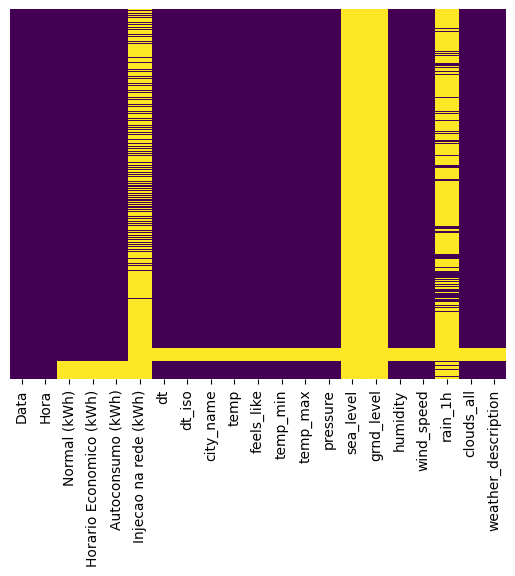

In [7]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df_final_v1.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [8]:
# Converter a coluna 'dt_iso' para o formato datetime
df_meteriologia2 = df_meteriologia.copy()

df_meteriologia2['dt_iso'] = list ( map(lambda x:( datetime.strptime(x, "%Y-%m-%d %H:%M:%S %z %Z") ).strftime("%Y-%m-%d %H:%M:%S"), df_meteriologia2['dt_iso']) )
#print(df_meteriologia['dt_iso'])

df_meteriologia2['dt_iso'] = pd.to_datetime(df_meteriologia2['dt_iso'])

# Realizar a junção
df_final_v2 = pd.merge(df_energia, df_meteriologia2, left_on=['Data', 'Hora'], right_on=[df_meteriologia2['dt_iso'].dt.strftime('%Y-%m-%d'), df_meteriologia2['dt_iso'].dt.hour], how='inner')

# Exibir o DataFrame resultante
print(df_final_v2)


             Data  Hora  Normal (kWh)  Horario Economico (kWh)  \
0      2021-09-29     0         0.000                    0.000   
1      2021-09-29     1         0.000                    0.000   
2      2021-09-29     2         0.000                    0.000   
3      2021-09-29     3         0.000                    0.000   
4      2021-09-29     4         0.000                    0.000   
...           ...   ...           ...                      ...   
12763  2023-03-14    19         0.329                    0.000   
12764  2023-03-14    20         0.401                    0.000   
12765  2023-03-14    21         0.670                    0.000   
12766  2023-03-14    22         0.000                    0.558   
12767  2023-03-14    23         0.000                    0.569   

       Autoconsumo (kWh) Injecao na rede (kWh)          dt  \
0                    0.0                   NaN  1632873600   
1                    0.0                   NaN  1632877200   
2                    

In [9]:
# Exibir o DataFrame resultante
print(df_final_v2.head())
print('----------------------------------------------------------------------------------------------------------------')
print(df_final_v2.nunique())
print('----------------------------------------------------------------------------------------------------------------')
print(df_final_v2['feels_like'].value_counts())

         Data  Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injecao na rede (kWh)          dt              dt_iso city_name   temp  ...  \
0                   NaN  1632873600 2021-09-29 00:00:00     local  13.97  ...   
1                   NaN  1632877200 2021-09-29 01:00:00     local  13.48  ...   
2                   NaN  1632880800 2021-09-29 02:00:00     local  12.93  ...   
3                   NaN  1632884400 2021-09-29 03:00:00     local  12.61  ...   
4                   NaN  1632888000 2021-09-29 04:00:00     local  12.61  ...   

   temp_min  temp_max  pre

<Axes: >

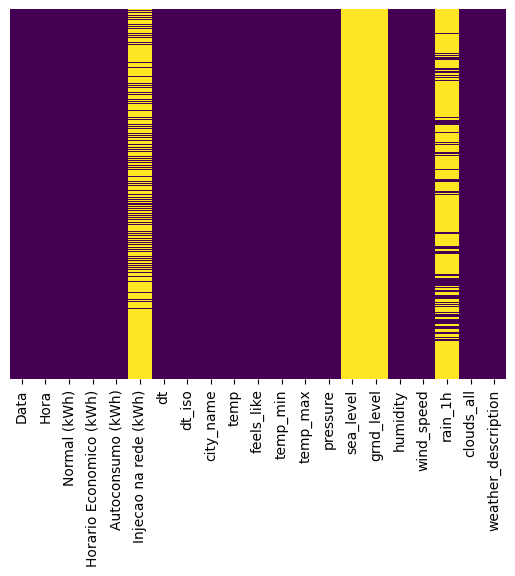

In [10]:
# ver se existem celulas vazias e se existirem temos de decidir preencher ou apagalas
sns.heatmap(df_final_v2.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [11]:
# ver se existem linhas duplicadas se sim apager se não não fazer nada
#print ( df.duplicated().sum() ) # não existem duplicadas por isso não fazemos nada

In [12]:
#apagar as colunas com sempre os mesmo elemento

#print(df['city_name'].value_counts())
#df.drop(['city_name'], inplace = True, axis = 1) # apaga-mos a coluna 'city_name'
#df.head() #verificamos que a coluna não existe mais